In [158]:
# Import the library
import matplotlib as mpl  # General matplotlib functions
import numpy as np  # For numerical calculations
import matplotlib.pyplot as plt  # For plotting

#library for animation
from math import cos, sin  # For trigonometric calculations
from matplotlib.animation import FuncAnimation  # For creating animations
from IPython.display import HTML  # For displaying animations in notebooks

In [160]:
# Given the radius of the sphere is r = 100
r = 100


In [162]:
# define the full set of points on the surface, the surface as a parametrization of z-values using z= z(x,y), 
# and the surface is defined by np.linspace

# first, let's create the point of the surface for the x-axis
# We are taking the 1000 points to create the sphere in higher resolution, we have tested the sphere using 500 points as well 
# In our case, we have r = 100, so it will generate the surface point evenly from (-100, 100)

x = np.linspace(-r, r, 1000)  # 1000 points between -100 and 100



# second, let's create the point of the surface for the y-axis 
# We are taking the 1000 points same as the x-axis 

y = np.linspace(-r, r, 1000)  # 1000 points between -100 and 100

# numpy.meshgrid function returns two 2-Dimensional arrays representing the X and Y coordinates of all the points
# In our case x, y = 1000 points, so we will have x and y of size 1000 i.e. : (1000, 1000)

X, Y = np.meshgrid(x, y)  # Create a grid of x, y points

# For every point of the gird we have to calculate z_square,
# To calculate the z_square value we will apply the formula (r^2 = x^2 + y^2 + z^2) -> (Z^2 = r^2 - x^2 - y^2)

Z_square = r**2 - X**2 - Y**2  


# We will get the 3D surface or volume plot of a sphere
# In some cases, we can have a negative value for the z_square if the values of x and y appear outside the sphere, however z_square value 
#cannot be negative, so we have to mask out the pixels that are larger than the region



In [164]:
# to take only one hemisphere (the positive one).
# to mask out the points in the regions
# (mask = Z_square <= 0) This will create a mask that identifies the points outside the sphere
# It will give the boolean value where True means the point is out of the sphere and False means the points are valid

mask = Z_square <= 0  # to mask where z^2 is negative (outside the sphere)

# If we get the boolean value to True which means that the points are outside of the sphere, 
# We will set the value to NaN(Not a Number) so that we can ignore the points that are outside of the region


Z_square[mask] = np.nan  # set the invalid points as NaN

# Once we get the valid points, which are the points inside the region, we will square the value value of the z
# We have set the invalid point to NaN, so whenever we get those invalid points, we will receive the z_square value as an invalid
# As a result we will only the upper hemisphere

Z = np.sqrt(Z_square)  # Calculate positive Z values only


# Now we will replace all the invalid points and set them as a "0", which will help us for easy visualize the surface 
Z = np.nan_to_num(Z, nan=0)  # Replace NaN with zero for easy visualization




In [166]:
# ---- Functions: Calculate Partial Derivatives ----
# We will calculate the partial derivate of z with respect to x which is defined by the equation: (r^2 = x^2 +y^2+z^2)
# partial derivative of z with respect to x = (dz/dx = -x / sqrt(r^2 - x^2 - y^2))
# where x = points of x-coordinates, y = points of y-coordinates, r = radius of sphere


def partial_derivative_x(x, y, r):
    # first calculate the z_sqaure value using formula(r**2 - x**2 - y**2)
    Z_square = r**2 - x**2 - y**2 

    # to take only the positive one mask out all the negative value
    # Mark invalid points as NaN
    
    Z_square[Z_square <= 0] = np.nan  

    # Now, calculate the z_square value 
    # using z = z^2
    z_value = np.sqrt(Z_square)  

    # Now, let's replace the NAN by 1.
    # In this case, we use one because we have to avoid the error of division by zero
    
    z_value = np.nan_to_num(z_value, nan=1)  

    # finally we will return the partial derivate of z with respect to x
    
    return -x / z_value  



In [168]:
# ---- Functions: Calculate Partial Derivatives ----
# This function is the same as the above function; now 
# We will calculate the partial derivate of z with respect to y which is defined by the equation: (r^2 = x^2 +y^2+z^2)
# partial derivative of z with respect to y = (dz/dy = -x / sqrt(r^2 - x^2 - y^2))
# where x = points of x-coordinates, y = points of y-coordinates, r = radius of sphere


def partial_derivative_y(x, y, r):
     # first calculate the z_sqaure value using formula(r**2 - x**2 - y**2)
    Z_square = r**2 - x**2 - y**2

    # to take only the positive one mask out all the negative value
    # Mark invalid points as NaN
    Z_square[Z_square <= 0] = np.nan  

    # Now, calculate the z_square value 
    # using z = z^2
    z_value = np.sqrt(Z_square)  

    # Now, let's replace the NAN by 1.
    # In this case, we use one because we have to avoid the error of division by zero
    
    z_value = np.nan_to_num(z_value, nan=1)  

    # finally we will return the partial derivate of z with respect to y

    return -y / z_value  # Return the calculated partial derivative




In [170]:
# Calculate partial derivatives for x, y, and z for normal vector
# We will calculate partial derivatives for normal vectors for every point on the surface
# We have a sphere (r^2 = x^2 + y^2 + z^2), 
# n = (dz/dx, dz/dy, dz/dz)


# partial derivate with respect to x
px = partial_derivative_x(X, Y, r)

# partial derivate with respect to y 
py = partial_derivative_y(X, Y, r)

# partial derivate of z
# Z-component is always positive (pointing outward)
pz = np.ones_like(Z) 



In [172]:
# to normalize the vector
# Normalize the normal vector to unit length
# We will normalize by using (square(px^2 +py^2+pz^2)
# We will receive output as a unit vector representing the direction of the normal vector at the point

norm = np.sqrt(px**2 + py**2 + pz**2)
px /= norm
py /= norm
pz /= norm


In [174]:
# Given illumination direction I = (0.13,0,0.94), for x, y, and z respectively
imn_sphere = np.array([0.13, 0, 0.94])

# Normalize the illumination vector norm = (square(ix^2 +iy^2+iz^2)
imn_sphere = imn_sphere / np.linalg.norm(imn_sphere)  



In [176]:
# Now let's calculate the intensity for the sphere
# We will calculate the illumination intensity at each point using the dot product of i and the normal vector
# intensity = (px, py, pz).(imn_sphere[0],imn_sphere[1], imn_sphere[2]) 
# intensity = px.imn_sphere[0]+ py.imn_sphere[1] + pz.imn_sphere[2]

Intensity_static = px * imn_sphere[0] + py * imn_sphere[1] + pz * imn_sphere[2]

# Now we will ensure that the value will be in the valid range i.e. = [0,1]

Intensity_static = np.clip(Intensity_static, 0, 1)

# We will mask the invalid region
# to visualize the gray background 
Intensity_static[mask] = 0.5  




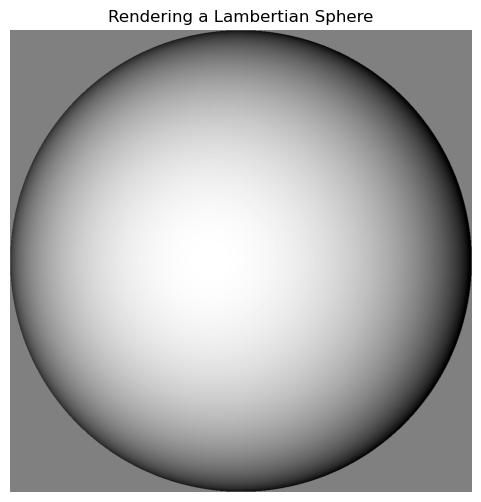

In [178]:
# Visualize the sphere

# We will create a sphere of size 6*6
plt.figure(figsize=(6, 6))

# plot the image and show the sphere
# if we have 0 then it will be black as it will not hit any light 
# if we have 1 then it will be white as it will have the light 
# if we have 0.5, then it will be gray which will represent the background 

plt.imshow(Intensity_static, cmap='gray', extent=[-r, r, -r, r])

# We have disabled the axis for clear visualization
plt.axis('off')

# title of our sphere
plt.title('Rendering a Lambertian Sphere')

# now let's visualize our sphere

plt.show()




In [180]:

# ****** --- Bonus --- ***** 
# ---- Animation ----

# Given Number of frames for the animation = 30 
num_frames = 30  

# We will define a function to create an animation 
# To create an animation we will rotate our light source 

def update(frame):

    # We will clear all the previous frames, which will allow us to draw the fresh frame
    ax.clear()  

    # We will compute the rotation angle to rotate the light source
    theta = 2 * np.pi * frame / num_frames 

    # We will create a dynamic illumination vector moving in a circular path
    # x-axis light source 
    Ix = 0.13 * cos(theta) 

    # y-axis light source
    Iy = 0.13 * sin(theta)  

    # z-axis light source
    Iz = 0.94  

    # rotating illumination vector
    I = np.array([Ix, Iy, Iz])

    # We will normalize the vector as we have done above
    I = I / np.linalg.norm(I)  

    # Calculate intensity at each point using the dot product of normal and light source vectors
    # formula: intensity = (px, py, pz).(imn_sphere[0],imn_sphere[1], imn_sphere[2]) 
    # intensity = px.imn_sphere[0]+ py.imn_sphere[1] + pz.imn_sphere[2]
    Intensity = px * I[0] + py * I[1] + pz * I[2]

    # Ensure values are within the valid range [0,1]
    Intensity = np.clip(Intensity, 0, 1)  

    # Mask the outside of the sphere with a gray background
    Intensity_masked = Intensity.copy()

    # We will mask the invalid region
    # to visualize the gray background 
    Intensity_masked[mask] = 0.5 

    # plot the image and show the sphere
    # if we have 0 then it will be black as it will not hit any light 
    # if we have 1 then it will be white as it will have the light 
    # if we have 0.5, then it will be gray which will represent the background 
    ax.imshow(Intensity_masked, cmap='gray', extent=[-r, r, -r, r])

    # We have disabled the axis for clear visualization
    ax.axis('off')  

    # title of our sphere

    ax.set_title('Lambertian Sphere Animation')  # Set plot title


# Create the animation
spehere_animation = FuncAnimation(fig, update, frames=num_frames, interval=100, repeat=True)

# Display the animation
HTML(spehere_animation.to_jshtml())
